## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def norma_2(A):
    M=A.T@A
    autoval = np.linalg.eigvals(M)
    return np.sqrt(np.max(autoval))

In [3]:
def norma_inf(A):
    sum=np.sum(A,axis=1)
    return np.max(sum)

In [4]:
x=np.arange(1.0,7.0,1)
A = np.vander(x, increasing=True)
print("norma infinito", norma_inf(A), np.linalg.norm(A,np.inf))
k=norma_inf(A)*norma_inf(np.linalg.inv(A))
print("indice di condizionamento",k, np.linalg.cond(A))

norma infinito 9331.0 9331.0
indice di condizionamento 9331.000000001404 731200.9387889352


In [5]:
import scipy.linalg
x=np.ones(6).reshape(6,1)
b=np.sum(A,axis=1)
print(b)
sol = scipy.linalg.solve(A,b)
bp=b.copy()
bp[0]=bp[0]+0.025
ek_dati=np.linalg.norm(bp-b,np.inf)/np.linalg.norm(b,np.inf)
print("errore sui dati",ek_dati*100 ,"%")
xp=scipy.linalg.solve(A,bp)
ek_ris=np.linalg.norm(xp-x,np.inf)/np.linalg.norm(x,np.inf)
print("errore sui risultati",ek_ris*100,"%")
print("indice di condizionamento", np.linalg.cond(A))

[6.000e+00 6.300e+01 3.640e+02 1.365e+03 3.906e+03 9.331e+03]
errore sui dati 0.0002679241238881187 %
errore sui risultati 52.49999999803303 %
indice di condizionamento 731200.9387889352


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [6]:
A=np.array([[6.0,63.0,662.2],[63.0,662.2,6967.8],[662.0,6967.8,73393.5664]])
b=np.array([1.1,2.33,1.7]).reshape(3,1)
print(A)
print(b)
x=scipy.linalg.solve(A,b)
print(x)
Ap=A.copy()
Ap[0][0]=Ap[0][0]*0.01
ek_matrix=np.linalg.norm(Ap-A,np.inf)/np.linalg.norm(A,np.inf)
print("perturbazione sulla matrice dei coefficienti",ek_matrix)
xp=scipy.linalg.solve(Ap,b)
ek_ris = np.linalg.norm(xp-x,np.inf)/np.linalg.norm(x,np.inf)
print("perturbazione sui risultati ",ek_ris)
print("indice di condizionamento", np.linalg.cond(A))

[[6.00000000e+00 6.30000000e+01 6.62200000e+02]
 [6.30000000e+01 6.62200000e+02 6.96780000e+03]
 [6.62000000e+02 6.96780000e+03 7.33935664e+04]]
[[1.1 ]
 [2.33]
 [1.7 ]]
[[-370.96488783]
 [  83.96912207]
 [  -4.62574051]]
perturbazione sulla matrice dei coefficienti 7.331218466874268e-05
perturbazione sui risultati  0.9996954377670704
indice di condizionamento 42640504.682712294


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

In [7]:
A=scipy.linalg.hilbert(4)
b=np.array([1.0,1.0,1.0,1.0])
x=scipy.linalg.solve(A,b)
print(x)
bp=np.array([0.01,-0.01,0.01,-0.01])
xp=scipy.linalg.solve(A,bp)
ek_dati=np.linalg.norm(b-bp,np.inf)/np.linalg.norm(b,np.inf)
ek_ris=np.linalg.norm(xp-x,np.inf)/np.linalg.norm(x,np.inf)
print("indice di condizionamento", np.linalg.cond(A))
print(ek_dati*100, "%")
print(ek_ris*100, "%")

[  -4.   60. -180.  140.]
indice di condizionamento 15513.738738929038
101.0 %
175.66666666666757 %


## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [8]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [9]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [10]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [11]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [12]:
import SolveTriangular
def LUsolve(P,A,L,U,b):
    pb=np.dot(P,b)
    y,flag = SolveTriangular.Lsolve(L,pb)
    x,flag= SolveTriangular.Usolve(U,y)
    return x

In [13]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b=np.sum(A,axis=1).reshape(4,1)
x=scipy.linalg.solve(A,b)
PT,L,U = scipy.linalg.lu(A)
P=PT.T.copy()
x1=LUsolve(PT,A,L,U,b)
print(x)
print(x1)
ek_sol=np.linalg.norm(x1-x,np.inf)/np.linalg.norm(x,np.inf)
print("perturbazione risultati", ek_sol*100, "%")

[[1.]
 [1.]
 [1.]
 [1.]]
[[ 0.35051546]
 [-2.36082474]
 [ 1.36082474]
 [ 3.03092784]]
perturbazione risultati 336.08247422680364 %


## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [14]:
def solve_nsis(A,B):
    m,n = B.shape
    X=np.zeros((n,n))
    PT,L,U=scipy.linalg.lu(A)
    P=PT.T.copy()
    for i in range(B.shape[1]):
        b=B[:,i]
        pb=P@b
        y,flag=SolveTriangular.Lsolve(L,pb)
        x,flag=SolveTriangular.Usolve(U,y)
        X[:,i]=x.reshape(n,)
    return X


In [15]:
A=np.array([[3.0,5.0,7.0],[2.0,3.0,4.0],[5.0,9.0,11.0]])
m,n=A.shape
B=np.eye(m)
X=solve_nsis(A,B)
X1=np.linalg.inv(A)
print(X)
print(X1)

[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
[[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [16]:
A=np.array([[3.0,5.0,7.0],[2.0,3.0,4.0],[5.0,9.0,11.0]])
print("scipy det(A)=",np.linalg.det(A))
PT,L,U=scipy.linalg.lu(A)
prod=1
for i in range(U.shape[0]):
    prod*=U[i,i]

print("det(A)=", np.linalg.det(P)*prod)

det1=np.prod(np.diag(U))*np.linalg.det(P)
print(det1)


scipy det(A)= 1.9999999999999996
det(A)= 1.9999999999999996
1.9999999999999996


## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

In [17]:
def Hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

[1. 1. 1. 1.]
indice di condizionamento matrice di Hankel di ordine 4 = 166.0240054260497
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
indice di condizionamento matrice di Hankel di ordine 10 = 13711.71212423132
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
indice di condizionamento matrice di Hankel di ordine 16 = 904809.0053891677
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
indice di condizionamento matrice di Hankel di ordine 22 = 58447673.27337673
[1.00000005 0.9999999  1.00000003 0.99999998 1.00000016 0.99999984
 1.00000003 0.99999998 1.00000014 0.99999993 0.99999998 0.99999997
 1.00000004 0.99999994 1.00000004 1.00000003 0.99999993 1.00000005
 0.99999993 1.00000005 1.00000002 0.99999996 1.00000012 0.99999988
 0.9999999  1.00000032 0.99999969 1.00000009]
indice di condizionamento matrice di Hankel di ordine 28 = 3755611727.0099626
[1.00000681 1.00000041 1.00000188 0.99999984 0.99999841 1.00000001
 0.99999301 1.00001298 0.99999517 0.99999814 1.00000464 0.99999323
 1.

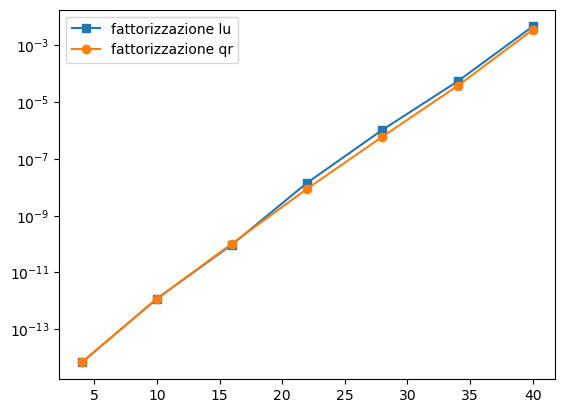

In [18]:
x_lu=[]
x_qr=[]
ek_lu=[]
ek_qr=[]

#partendo da 4, aumentando di 6, fino a includere 40
for i in range(4,41,6):
    A=Hankel(i)
    b=np.sum(A,axis=1)
    x=scipy.linalg.solve(A,b)
    print(x)

    PT,L,U=scipy.linalg.lu(A)
    pb=PT.T@b
    y1,flag =SolveTriangular.Lsolve(L,pb)
    x1,flag=SolveTriangular.Usolve(U,y1)
    x_lu.append(x1)

    Q,R=scipy.linalg.qr(A)
    y2=Q.T@b
    x2,flag=SolveTriangular.Usolve(R,y2)
    x_qr.append(x2)

    ek_lu.append(np.linalg.norm(x1-x, 2)/np.linalg.norm(x, 2))
    ek_qr.append(np.linalg.norm(x2-x, 2)/np.linalg.norm(x, 2))
    #print("perturbazione metodo lu",ek_lu*100, "%")
    #print("perturbazione metodo qr",ek_qr*100, "%")
    print("indice di condizionamento matrice di Hankel di ordine",i, "=", np.linalg.cond(A,2))

plt.semilogy(range(4,41,6), ek_lu, 's-', range(4,41,6), ek_qr, 'o-')
plt.legend(['fattorizzazione lu','fattorizzazione qr'])


## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

In [19]:
def crea_matrix(n):
    A=np.zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            if i==j or j==n-1:
                A[i][j]=1
            elif i>j:
                A[i][j]=-1
            else:
                A[i][j]=0
    return A                

indice di condizionamento di ordine 48 = 21.406365537094345
indice di condizionamento di ordine 50 = 22.30573809496506
indice di condizionamento di ordine 52 = 23.2051824337774
indice di condizionamento di ordine 54 = 24.10469067007275
indice di condizionamento di ordine 56 = 25.004256033270956
indice di condizionamento di ordine 58 = 25.903872676110886


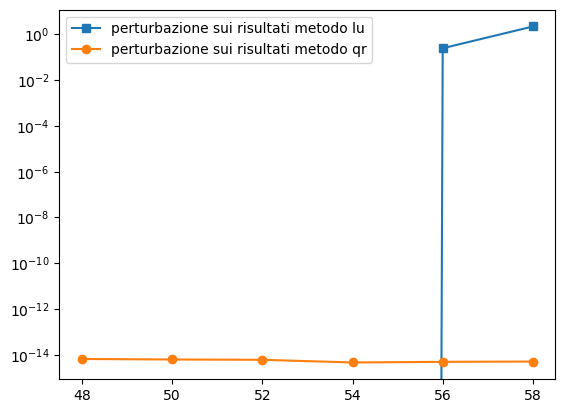

In [20]:
ek_lu=[]
ek_qr=[]
for i in range(48,59,2):
    A=crea_matrix(i)
    x=np.ones((i,1))
    b=A@x

    PT,L,U=scipy.linalg.lu(A)
    pb=PT.T@b
    y1,flag=SolveTriangular.Lsolve(L,pb)
    x1,flag=SolveTriangular.Usolve(U,y1)
    ek_lu.append(np.linalg.norm(x1-x, 2)/np.linalg.norm(x,2))

    Q,R= scipy.linalg.qr(A)
    y2=Q.T@b
    x2,flag=SolveTriangular.Usolve(R,y2)
    ek_qr.append(np.linalg.norm(x2-x, 2)/np.linalg.norm(x,2))
    print("indice di condizionamento di ordine", i, "=", np.linalg.cond(A,2))


plt.semilogy(range(48,59,2), ek_lu, 's-', range(48,59,2), ek_qr, 'o-')
plt.legend(['perturbazione sui risultati metodo lu', 'perturbazione sui risultati metodo qr'])

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [46]:
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    n=A.shape[0]
    D=np.diag(A)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F) #M=D
    T=np.diag(1/D)@N
    autovalori=np.linalg.eigvals(T)
    print("raggio spettrale jacobi", np.max(np.abs(autovalori)))
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+np.dot(N,x0))/D.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 10
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [49]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    D=np.diag(np.diag(A))
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=E+D
    N=-F
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    print("raggio spettrale Gauss-Seidel ",np.max(np.abs(autovalori)))
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        x,flag=SolveTriangular.Lsolve(M,(b-F@x0))
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

[[ 4  1  3]
 [ 3  4  1]
 [ 1  1 17]]
raggio spettrale jacobi 0.5586853131416272
raggio spettrale Gauss-Seidel  0.1943151503079159
[[1.]
 [1.]
 [1.]] 35
[[1.]
 [1.]
 [1.]] 13


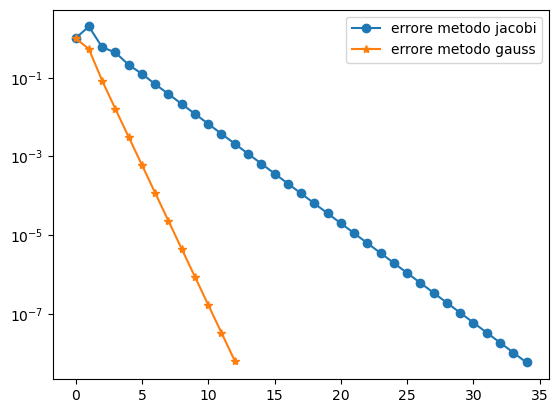

In [51]:
A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
print(A)
x0=np.zeros((A.shape[0],1))
b=np.sum(A,axis=1).reshape(A.shape[0],1)

x_j,it_j,ek_j = jacobi(A,b,x0,1e-8,500)
x_g,it_g,ek_g = gauss_seidel(A,b,x0,1e-8,100)
plt.semilogy(np.arange(it_j), ek_j, 'o-', np.arange(it_g), ek_g, '*-')
plt.legend(['errore metodo jacobi', 'errore metodo gauss'])
print(x_j, it_j)
print(x_g, it_g)
# entrambi i metodi convergono alla soluzione perchè il raggio spettrale è < 1, come enunciato dal teorema.
# Inoltre il metodo di Gauss converge alla soluzione più velocemente rispetto al metodo di jacobi perchè il raggio spettrale di Gauss 0,31..< raggio spettrale di jacobi 0,55..


raggio spettrale jacobi 1.3748593749588482
raggio spettrale Gauss-Seidel  0.1250000000000001
[[1.60545197e+69]
 [2.94657824e+69]
 [1.65545302e+69]] 501
[[1.]
 [1.]
 [1.]] 12
False


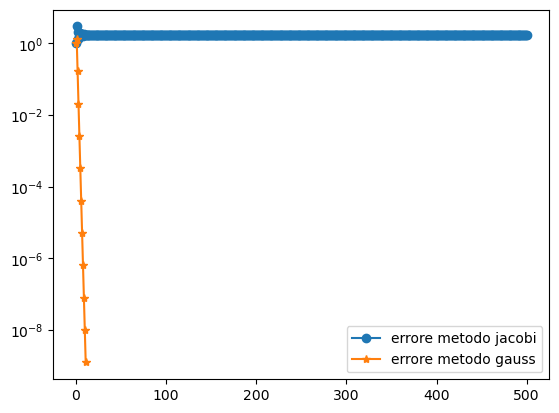

In [53]:
A1=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
x0=np.zeros((A1.shape[0],1))
b=np.sum(A1,axis=1).reshape(A1.shape[0],1)
x_j,it_j,ek_j = jacobi(A1,b,x0,1e-8,500)
x_g,it_g,ek_g = gauss_seidel(A1,b,x0,1e-8,500)
plt.semilogy(range(it_j), ek_j, 'o-', range(it_g), ek_g, '*-')
plt.legend(['errore metodo jacobi', 'errore metodo gauss'])
print(x_j, it_j)
print(x_g,it_g)
print(np.all(np.linalg.eigvals(A1)>0)) 
#raggio spettrale di jacobi è > 1 perciò il metodo non converge alla soluzione
#mentre il raggio spettrale di gauss, non solo è minore di uno ma è anche molto piccolo, 
#quindi converge alla soluzione in soli 12 iterazioni

raggio spettrale jacobi 0.5287229642709426
raggio spettrale Gauss-Seidel  0.12909944487358055
[[1.]
 [1.]
 [1.]
 [1.]] 31
[[1.]
 [1.]
 [1.]
 [1.]] 11
True


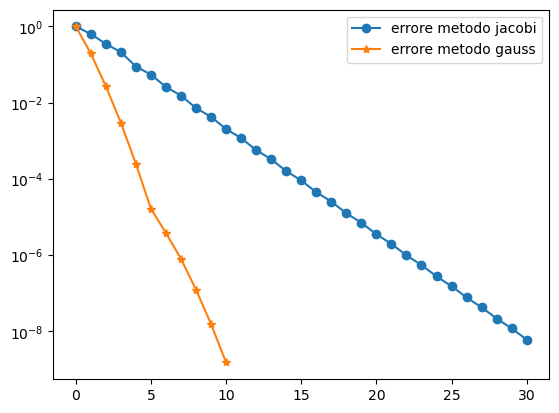

In [55]:
A2=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])
x0=np.zeros((A2.shape[0],1))
b=np.sum(A2,axis=1).reshape(A2.shape[0],1)
x_j,it_j,ek_j = jacobi(A2,b,x0,1e-8,500)
x_g,it_g,ek_g = gauss_seidel(A2,b,x0,1e-8,500)
plt.semilogy(range(it_j), ek_j, 'o-', range(it_g), ek_g, '*-')
plt.legend(['errore metodo jacobi', 'errore metodo gauss'])
print(x_j, it_j)
print(x_g,it_g)
print(np.all(np.linalg.eigvals(A2)>0)) # la matrice è definita positiva quindi Gauss converge (verifica il teorema)
# entrambi i metodi convergono alla soluzione perchè il raggio spettrale è < 1, come enunciato dal teorema.
# Inoltre il metodo di Gauss converge alla soluzione più velocemente rispetto al metodo di jacobi perchè il raggio spettrale di Gauss 0,31..< raggio spettrale di jacobi 0,55..


## Esercizio 12
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [57]:
def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    D=np.diag(np.diag(A))
    Dinv=np.linalg.inv(D)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<it_max and errore>=toll:
        temp=b-F@xold
        xtilde,flag=SolveTriangular.Lsolve(M,temp)
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

In [27]:
def creaPoisson(n):
    A=np.zeros((n,n))
    A=A+4*np.eye(n)+(-1)*np.eye(n,k=-1)+(-1)*np.eye(n,k=+1)+(-1)*np.eye(n,k=+3)+(-1)*np.eye(n,k=-3)
    return A            

In [60]:
A=creaPoisson(10)
print(A)
x=np.zeros((A.shape[0],1))
b=np.sum(A,axis=1)
omega=1.5
x_j,it_j,ek_j = jacobi(A,b,x0,1e-10,500)
x_g,it_g,ek_g = gauss_seidel(A,b,x0,1e-10,500)
x_gs,it_gs,ek_gs = gauss_seidel_sor(A,b,x0,omega,1e-8,500)
print(x_j)
print(x_g)
print(x_gs)

[[ 4. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  4. -1.  0. -1.  0.  0.  0.  0.]
 [-1.  0. -1.  4. -1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  4. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  4. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  0. -1.  4. -1.  0. -1.]
 [ 0.  0.  0.  0. -1.  0. -1.  4. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  4.]]
raggio spettrale jacobi 0.8451732757464308


ValueError: shapes (10,10) and (4,1) not aligned: 10 (dim 1) != 4 (dim 0)